In [1]:
import ipywidgets as widgets
from IPython.display import display

# GUI elements

api_header = widgets.HBox([widgets.Label(value="Enter Genius API Key")])

api_text = widgets.Text(
    value='',
    placeholder='Enter Genius API Key..',
    description='API:',
    disabled=False
)

api_button = widgets.Button(
    description='Store API',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Store API Key',
    icon='save' # (FontAwesome names without the `fa-` prefix)
)

header = widgets.HBox([widgets.Label(value="Sound Cloud Search")])

song_text = widgets.Text(
    value='',
    placeholder='Enter song name..',
    description='Song:',
    disabled=False
)

artist_text = widgets.Text(
    value='',
    placeholder='Enter artist name..',
    description='Artist:',
    disabled=False
)

generate_button = widgets.Button(
    description='Generate Cloud',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Generate Word Cloud',
    icon='cloud' # (FontAwesome names without the `fa-` prefix)
)
profanity_check = widgets.Checkbox(
            value = False,
            description = 'Remove Profanity',
            disabled = False,
            indent = True)
suprise_button = widgets.Button(
    description = 'Suprise Me',
    disabled = False,
    button_style = 'success',
    tooltip = 'Generate Random Song Cloud',
    icon = 'question')

clear_button = widgets.Button(
    description='Clear Search',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Clear Search',
    icon='times-circle' # (FontAwesome names without the `fa-` prefix)
)
color_dropdown = widgets.Dropdown(
    options=['Blue', 'Red', 'Green', 'Purple', 'Multi-color', 'Multi-color 2'],
    description='Color theme:',
    value='Blue',
    disabled=False,
)

color_dropdown = widgets.Dropdown(
    options=['Blue', 'Red', 'Green', 'Purple', 'Multi-color', 'Multi-color 2'],
    description='Color theme:',
    value='Blue',
    disabled=False,
)

output = widgets.Output()

In [2]:
# lyricsgenius

import lyricsgenius

genius = lyricsgenius.Genius(api_text.value, remove_section_headers = True)

In [3]:
# Button handling
from collections import Counter
from itertools import dropwhile
from better_profanity import profanity
import random

lyric_count = Counter()
profanity.load_censor_words() #loads the list of bad words into the library
basic_words=["the", "i", "a", "be", "to", "of", "and", "in", "it", "for", "not", "on", "with", "he", "as", "you", "do", "this", "but", "his"]
#20 most common words in englsih words may switch to 10 for the sake of songs
random_artists = ["Taylor Swift", "Ariana Grande", "Tyler the Creator", "Adele"] #random artists for our suprise function
def api_button_clicked(b):
    genius = lyricsgenius.Genius(api_text.value, remove_section_headers = True)
    with output:
        print("[DEBUG - api_button_clicked]\nAPI key:", api_text.value, "\n")
def color_changed(change):
    with output:
        if change['type'] == 'change' and change['name'] == 'value':
            print("[DEBUG - color_changed()]\nColor changed to %s" % change['new'], "\n")
color_dropdown.observe(color_changed)
       
def generate_button_clicked(b):
    with output:
        print("[DEBUG - generate_button_clicked]\nSong:", song_text.value, "\nArtist:", artist_text.value, "\n")
        try:
            song = genius.search_song(song_text.value, artist_text.value) #text_format = "" 
            cloudMaker(song)
        except TypeError as err:
            print("\n\t--- ERROR - Enter API key correctly ---\t\n")

def suprise_button_clicked(b):
    artist = random.choice(random_artists)
    random_song = genius.search_artist(artist, max_songs=1, sort='popularity') #a dictionary of the artists and the song
    cloudMaker(random_song.songs[0]) #call cloud maker with the artist's popular song
    #genius.search_artist(song_text.value, max_songs=1)[1]
def clear_button_clicked(b):
    song_text.value = ''
    artist_text.value = ''
    with output:
        print("[DEBUG - clear_clicked()]\nCleared 'song_text' and 'artist_text'\n")
        
def cloudMaker(song): #place cloud generater in this function
    lyrics = song.lyrics.replace('-', ' ').split()
    lyrics = [x.lower() for x in lyrics] # converts all values in list to lowercase
    lyrics = [x.replace(',','') for x in lyrics] # removes all commas 
    lyrics = [x.replace('(', '') for x in lyrics] #removes parenthesis
    lyrics = [x.replace(')', '') for x in lyrics]
    lyrics = [x.replace('?', '') for x in lyrics] #remove question marks
    lyrics = [x.replace('!', '') for x in lyrics] #remove exclamation points
    song_url = song.song_art_image_url #retrieves the song's photo
    for x in list(lyrics): #remove basic words such as "the" 
        if x in basic_words:
            lyrics.remove(x)
        if profanity_check.value == True: #If profanity box was clicked remove profanity
            for x in list(lyrics):
                if profanity.contains_profanity(x):
                        lyrics.remove(x)
    #censoredLyrics = profanity.censor(lyrics)
    #print(censoredLyrics)
    #lyrics = [x.replace('-',' ') for x in lyrics] # removes all dashes have to seperate the words
    #for x in censoredLyrics:
        #print(x)
            
    global lyric_count
    lyric_count = Counter(lyrics)

    # Remove lyrics where frequency is >= 4, needs to be dynamic based on song
    for key, count in dropwhile(lambda key_count: key_count[1] >= 3, lyric_count.most_common()):
        del lyric_count[key]
                
    print("[DEBUG - getting lyrics]\n",lyric_count,"\n")
    #song_url = song.song_art_image_url #retrieves the songs photo
    #song_artist_name = song.artist #retrieves the songs' artist name
    #song_title = song.title
                    
api_button.on_click(api_button_clicked)
generate_button.on_click(generate_button_clicked)
suprise_button.on_click(suprise_button_clicked)
clear_button.on_click(clear_button_clicked)

In [4]:
# Display GUI
display(api_header, api_text, api_button, header, song_text, artist_text, color_dropdown, profanity_check, generate_button, suprise_button, clear_button, output)

Text(value='', description='API:', placeholder='Enter Genius API Key..')

Button(button_style='info', description='Store API', icon='save', style=ButtonStyle(), tooltip='Store API Key'…

Text(value='', description='Song:', placeholder='Enter song name..')

Text(value='', description='Artist:', placeholder='Enter artist name..')

Dropdown(description='Color theme:', options=('Blue', 'Red', 'Green', 'Purple', 'Multi-color', 'Multi-color 2'…

Checkbox(value=False, description='Remove Profanity')

Button(button_style='success', description='Generate Cloud', icon='cloud', style=ButtonStyle(), tooltip='Gener…

Button(button_style='success', description='Suprise Me', icon='question', style=ButtonStyle(), tooltip='Genera…

Button(button_style='danger', description='Clear Search', icon='times-circle', style=ButtonStyle(), tooltip='C…

Output()

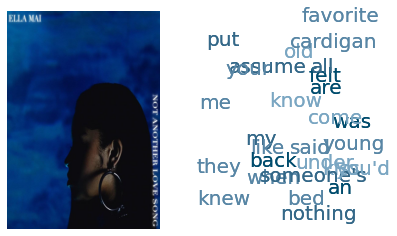

In [5]:
#matplotlib notebook
%matplotlib widget
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import Request, urlopen
import matplotlib.image as img
color_themes = {
                "Blue"          : ['#004c6d', '#346888', '#5886a5', '#7aa6c2'],
                "Red"           : ['#6d0001', '#8d3527', '#ab5d4c', '#c88474'],
                "Green"         : ['#166d03', '#448531', '#699d56', '#8cb67a'],
                "Purple"        : ['#59006d', '#793588', '#985da4', '#b785c0'],
                "Multi-color"   : ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600'],
                "Multi-color 2" : ['#3f515c', '#166d76', '#008872', '#4a9e50', '#9eab1a', '#ffa600']
               }
'''for lyric in enumerate(lyric_count):
    x_coord = np.random.randint(0, 100)
    y_coord = np.random.randint(0, 100)
    font_color = color_themes[color_dropdown.value][random.randint(0,len(color_themes[color_dropdown.value]) - 1)]
    plt.text(x_coord, y_coord, lyric[1], color=font_color, fontsize=20)
    plt.plot(x_coord, y_coord) # invisible plot points, required to scale graph properly'''
#     plt.plot(x_coord, y_coord, 'o', color=font_color) uncomment to see plotted points, may be easier for annotations?

#plt.figure(figsize = (1, 1)) #change size of the plot's figure
url = 'https://images.genius.com/f0503093b85ca3e2a793f8b660820196.1000x1000x1.jpg'
#just an example photo; generally use variable

req = Request(url, headers = {'User-Agent': 'XYZ/3.0'}) #need to request to open the photo
image = urlopen(req, timeout = 20)

a = plt.imread(image, format='jpg') #reads the image
#plt.imshow(a, aspect='auto')

fig, axs = plt.subplots(ncols = 2, nrows = 1) #create subplot for photo and cloud; semi works
axs[0].imshow(a, aspect = 'auto') #shows the image on the left column
axs[0].axis('off') #turns the photo's axis off
for lyric in enumerate(lyric_count):
    x_coord = np.random.randint(0, 100)
    y_coord = np.random.randint(0, 100)
    font_color = color_themes[color_dropdown.value][random.randint(0,len(color_themes[color_dropdown.value]) - 1)]
    plt.text(x_coord, y_coord, lyric[1], color=font_color, fontsize=20)
    axs[1].text(x_coord, y_coord, lyric[1], color=font_color, fontsize=20)
    axs[1].plot(x_coord, y_coord) # invisible plot points, required to scale graph properly
    

plt.axis('off')
#plt.imshow(a) #rs)
#plt.axis('off') # disable axis
plt.show()